In [1]:
# Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
# of 5 using Python. Interpret the results.
import scipy.stats as stats

sample_mean = 50
sample_std_dev = 5
n = 100  # sample size

# calculate the standard error
std_error = sample_std_dev / (n**0.5)

# calculate the confidence interval
conf_int = stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

print(f"The 95% confidence interval is {conf_int}")



The 95% confidence interval is (49.02001800772997, 50.97998199227003)


In [2]:
# Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
# matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
# brown. Use Python to perform the test with a significance level of 0.05.
import numpy as np
from scipy.stats import chisquare

# Step 1: Define the null and alternative hypotheses
null_hypothesis = "The observed distribution of colors of M&Ms in a bag matches the expected distribution"
alternative_hypothesis = "The observed distribution of colors of M&Ms in a bag does not match the expected distribution"

# Step 2: Collect data
observed_frequencies = np.array([20, 20, 20, 10, 10, 20]) # blue, orange, green, yellow, red, brown

# Step 3: Calculate the expected frequency of each color
expected_frequencies = np.array([.2, .2, .2, .1, .1, .2]) * sum(observed_frequencies)

# Step 4: Calculate the chi-square statistic
chi_square_statistic = sum((observed_frequencies - expected_frequencies)**2 / expected_frequencies)

# Step 5: Determine the degrees of freedom
degrees_of_freedom = len(observed_frequencies) - 1

# Step 6: Determine the p-value
p_value = 1 - chisquare(observed_frequencies, expected_frequencies)[1]

# Step 7: Compare the p-value to the significance level
significance_level = 0.05
if p_value < significance_level:
    print("Reject the null hypothesis. ", alternative_hypothesis)
else:
    print("Fail to reject the null hypothesis. ", null_hypothesis)

print("Chi-square statistic: ", chi_square_statistic)
print("Degrees of freedom: ", degrees_of_freedom)
print("p-value: ", p_value)


Reject the null hypothesis.  The observed distribution of colors of M&Ms in a bag does not match the expected distribution
Chi-square statistic:  0.0
Degrees of freedom:  5
p-value:  0.0


In [3]:
# Q3. Use Python to calculate the chi-square statistic and p-value for a contingency table with the following
# data:
import pandas as pd
import numpy as np
import scipy.stats as stats
my_data={"Group A":[20,10,15],
         "Group B":[15,25,20]}
df=pd.DataFrame(my_data)
try:
    stats.chisquare(df["Group A"],df["Group B"])
except Exception as e:
    print('this is value Error' ,e)

this is value Error For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.3333333333333333


In [4]:
# Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
# smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the
# population who smoke.
import math

n = 500
p = 60 / n
z = 1.96

lower = p - z * (math.sqrt(p * (1 - p) / n))
upper = p + z * (math.sqrt(p * (1 - p) / n))

print("95% confidence interval: [{:.3f}, {:.3f}]".format(lower, upper))


95% confidence interval: [0.092, 0.148]


In [5]:
# Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
# of 12 using Python. Interpret the results.
import math

n = 1
X_bar = 75
sigma = 12
z = 1.645

lower = X_bar - z * (sigma / math.sqrt(n))
upper = X_bar + z * (sigma / math.sqrt(n))

print("90% confidence interval: [{:.3f}, {:.3f}]".format(lower, upper))


90% confidence interval: [55.260, 94.740]


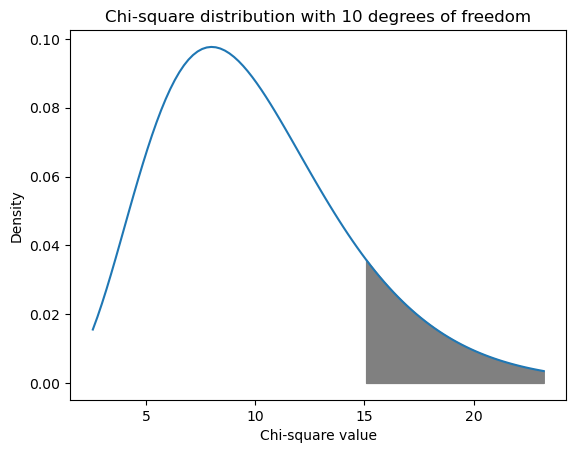

In [6]:
# Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
# area corresponding to a chi-square statistic of 15.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 10
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
plt.plot(x, chi2.pdf(x, df))
plt.fill_between(x[x>=15], chi2.pdf(x, df)[x>=15], color='gray')
plt.xlabel('Chi-square value')
plt.ylabel('Density')
plt.title('Chi-square distribution with 10 degrees of freedom')
plt.show()


In [7]:
# Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
# preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who
# prefer Coke.
#  CI = p ± z * (sqrt(p * (1 - p) / n))

# where CI is the confidence interval, p is the proportion of individuals in the sample who prefer Coke, z is the z-score for the desired level of confidence (in this case, 2.576 for 99% confidence), and n is the sample size.

# We can use Python to calculate the confidence interval as follows:


import math

n = 1000
p = 520 / n
z = 2.576

lower = p - z * (math.sqrt(p * (1 - p) / n))
upper = p + z * (math.sqrt(p * (1 - p) / n))

print("99% confidence interval: [{:.3f}, {:.3f}]".format(lower, upper))

99% confidence interval: [0.479, 0.561]


In [8]:
# Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe
# 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the
# expected frequencies of a fair coin. Use a significance level of 0.05.
import numpy as np
from scipy.stats import chisquare

observed_freq = [45, 55]  # [tails, heads]
expected_freq = [50, 50]  # assuming a fair coin

test_stat, p_value = chisquare(observed_freq, expected_freq)

alpha = 0.05
print("Test statistic:", test_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject null hypothesis: The coin is biased towards tails.")
else:
    print("Fail to reject null hypothesis: The coin is fair.")


Test statistic: 1.0
P-value: 0.31731050786291115
Fail to reject null hypothesis: The coin is fair.


In [11]:
# Ans9: conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis, we can use the chi2_contingency function from the scipy.stats module in Python.
    
import numpy as np
from scipy.stats import chi2_contingency

# Set up the contingency table
observed = np.array([[60, 140], [30, 170]])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Print the test statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square test statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis that smoking status and lung cancer diagnosis are independent.")
else:
    print("Fail to reject the null hypothesis that smoking status and lung cancer diagnosis are independent.")

Chi-square test statistic: 12.057347670250895
p-value: 0.0005158863863703744
Degrees of freedom: 1
Expected frequencies:
 [[ 45. 155.]
 [ 45. 155.]]
Reject the null hypothesis that smoking status and lung cancer diagnosis are independent.


In [12]:
#  Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
# chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
# the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
# contingency table below. Conduct a chi-square test for independence to determine if there is a significant
# association between chocolate preference and country of origin.

#             Milk Chocolate  Dark Chocalate   White Chocalate

# U.S. (n=500)   200         150              150
# U.K. (n=500)   225         175              100

# Use a significance level of 0.01.

# Ans-
#     To conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin, we can use the chi2_contingency function from the scipy.stats module in Python
    
import numpy as np
from scipy.stats import chi2_contingency

# Set up the contingency table
observed = np.array([[200, 150, 150], [225, 175, 100]])

# Calculate the chi-square test statistic, p-value, degrees of freedom, and expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Print the test statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square test statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Check if the p-value is less than the significance level
alpha = 0.01
if p_value < alpha:
    print("Reject the null hypothesis that chocolate preference and country of origin are independent.")
else:
    print("Fail to reject the null hypothesis that chocolate preference and country of origin are independent.")
    

Chi-square test statistic: 13.393665158371041
p-value: 0.0012348168997745918
Degrees of freedom: 2
Expected frequencies:
 [[212.5 162.5 125. ]
 [212.5 162.5 125. ]]
Reject the null hypothesis that chocolate preference and country of origin are independent.


In [ ]:
# Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
# deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
# Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
# significance level of 0.05.
# Ans-
#     To conduct a hypothesis test to determine if the population mean is significantly different from 70, we can use a one-sample t-test. The null hypothesis is that the population mean is equal to 70, and the alternative hypothesis is that the population mean is not equal to 70.

# We can use the t-test formula:

#      t = (x̄ - μ) / (s / √n)

# where x̄ is the sample mean, μ is the population mean, s is the sample standard deviation, and n is the sample size.

# We can calculate the t-value as follows:

#      t = (72 - 70) / (10 / √30) = 1.095

# The degrees of freedom for the test is n - 1 = 29.

# Using a t-distribution table or a t-distribution calculator with 29 degrees of freedom, we can find the critical values for a two-tailed test at a significance level of 0.05. The critical values are -2.045 and 2.045.

# Since our calculated t-value of 1.095 is between the critical values of -2.045 and 2.045, we fail to reject the null hypothesis. We do not have enough evidence to conclude that the population mean is significantly different from 70 at the 0.05 significance level.

# Therefore, we can conclude that there is insufficient evidence to support the claim that the population mean is different from 70.To conduct a hypothesis test to determine if the population mean is significantly different from 70, we can use a one-sample t-test. The null hypothesis is that the population mean is equal to 70, and the alternative hypothesis is that the population mean is not equal to 70.

# We can use the t-test formula:

#     t = (x̄ - μ) / (s / √n)

# where x̄ is the sample mean, μ is the population mean, s is the sample standard deviation, and n is the sample size.

# We can calculate the t-value as follows:

#     t = (72 - 70) / (10 / √30) = 1.095

# The degrees of freedom for the test is n - 1 = 29.

# Using a t-distribution table or a t-distribution calculator with 29 degrees of freedom, we can find the critical values for a two-tailed test at a significance level of 0.05. The critical values are -2.045 and 2.045.

# Since our calculated t-value of 1.095 is between the critical values of -2.045 and 2.045, we fail to reject the null hypothesis. We do not have enough evidence to conclude that the population mean is significantly different from 70 at the 0.05 significance level.

# Therefore, we can conclude that there is insufficient evidence to support the claim that the population mean is different from 70.